In [581]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

import joblib #Para empaquetar el modelo de regresión

In [582]:
!ls -h| grep .*.csv

test.csv
train.csv


In [583]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [584]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# limpieza

In [585]:
df.isna().sum()/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [586]:
df[df['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [587]:
# Borro la columna que tiene un porcentaje alto de nan
df.drop(columns='Cabin',inplace=True)

In [588]:
df = df[df['Age'].notna()]

# Tomar las variables discretas

In [589]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [590]:
vardis = ['Survived','Pclass', 'Sex',  'SibSp', 'Parch',  'Embarked']

In [591]:
for value in vardis:
    print('--',value,'--')
    print(df[value].unique())

-- Survived --
[0 1]
-- Pclass --
[3 1 2]
-- Sex --
['male' 'female']
-- SibSp --
[1 0 3 4 2 5]
-- Parch --
[0 1 2 5 3 4 6]
-- Embarked --
['S' 'C' 'Q' nan]


In [592]:
# Las variables categóricas son las que no tienen un sentido ordinal
varcat = ['Sex','Embarked','Pclass']

In [593]:
def one_hot_encoding(df,varcat):
    for value in varcat:
        dummis = pd.get_dummies(df[value],prefix=value)
        df = pd.concat([df,dummis],axis=1)
        df.drop(columns=value,inplace=True)
    return df

In [594]:
df = one_hot_encoding(df,varcat)

In [595]:
df.sample(5)

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
684,685,0,"Brown, Mr. Thomas William Solomon",60.0,1,1,29750,39.0000,0,1,0,0,1,0,1,0
807,808,0,"Pettersson, Miss. Ellen Natalia",18.0,0,0,347087,7.7750,1,0,0,0,1,0,0,1
249,250,0,"Carter, Rev. Ernest Courtenay",54.0,1,0,244252,26.0000,0,1,0,0,1,0,1,0
287,288,0,"Naidenoff, Mr. Penko",22.0,0,0,349206,7.8958,0,1,0,0,1,0,0,1
52,53,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",49.0,1,0,PC 17572,76.7292,1,0,1,0,0,1,0,0


# Outlaiers

In [596]:
var_num=['Age','Fare']

In [597]:
for i in var_num:
    print('--',i,'--')
    print(df[i].describe())

-- Age --
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
-- Fare --
count    714.000000
mean      34.694514
std       52.918930
min        0.000000
25%        8.050000
50%       15.741700
75%       33.375000
max      512.329200
Name: Fare, dtype: float64


In [598]:
limites = {}
for i in var_num:
    Q1 = np.percentile(df[i],q=25)
    Q3 = np.percentile(df[i],q=75)

    RI = Q3 - Q1

    limite_superior = Q3 + 1.5*RI
    limite_inferior = Q1 - 1.5*RI
    
    df[i] = df[i].apply(lambda x: None if (x < Q1 or x > Q3) else x)
    
    if df[i].isna().values.any():
        df.dropna(inplace=True)
        pass
    
    limites[i] = [limite_inferior,limite_superior]

In [599]:
df.isna().values.any()

False

In [600]:
#limites

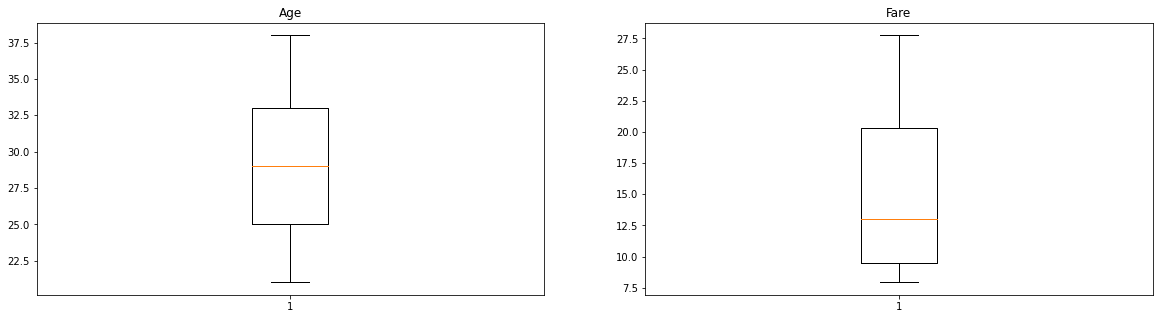

In [601]:
fig , (ax,ax2) = plt.subplots(1,2,figsize=(20,5))

ax.boxplot(df['Age'])
ax.set_title('Age')

ax2.boxplot(df['Fare'])
ax2.set_title('Fare')

plt.show()

# Correlaciones

In [602]:
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

#### Por cada categorí en las variables categorícas se deben dejat solo n -1 one-hot-encoding variable ,para evitar la multicolinalidad

In [603]:
df.drop(columns=['Sex_female','Embarked_C','Pclass_3'],inplace=True)

In [604]:
df['family_size'] = df['Parch'] + df['SibSp']

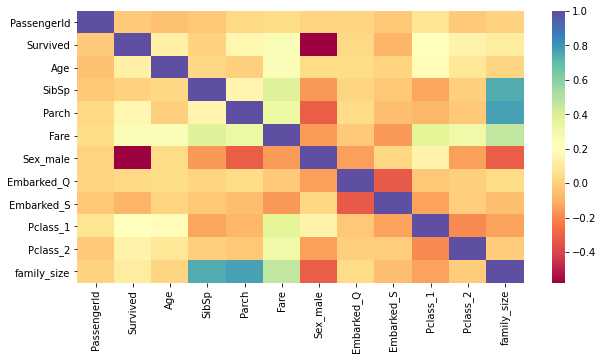

In [605]:
corr = df.corr()

plt.figure(figsize=(10,5))
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,cmap='Spectral',annot=False)
plt.show()

# Modelos

In [606]:
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2',
       'family_size'],
      dtype='object')

In [607]:
y = df.Survived
x = df[[ 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male'
        , 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2','family_size']]

In [608]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=1)

In [611]:
clf = [
    (LogisticRegression(max_iter=1000),'Logistc-regresion'),
    (DecisionTreeClassifier(),'Tree-classifier')
]

In [614]:
for model,name in clf:
    
    #Entrenar
    model.fit(X_train,y_train)
    
    #Predecir
    y_pred = model.predict(X_test)
    accurancy = accuracy_score(y_test,y_pred)
    print('El accutancy del modelo '+name+' es de '+str(round(accurancy*100,2))+'%')
    
    #Guardar
    joblib.file = 'modelo-'+name+'.pkl'

El accutancy del modelo Logistc-regresion es de 80.56%
El accutancy del modelo Tree-classifier es de 63.89%
